# Predicting Stock Prices with Linear Regression

To answer the question if we can accurately predict stock prices over time, I'm going to use Stock Price history data and apply a regression analysis method.

[A] Synopsis :- Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

Being the topic of interest for those who are interested in investing in share market and share exchanges because benefits here are not easy to calculate but easy to earn. Technical Analysis of jumping prices, sometimes high sometimes low, which not only depends on company businesses but also depends on the company-related news, political, social, economic conditions and natural disasters. Many researchers and financers have been acknowledged for the daily behavior and prediction of future prices, but some of the other way their models have not been totally accurate. This project is based on a complete mathematical analysis using Technical Analysis which is used to calculate the unknown patterns in the behaviors and changes of Stock Prices over a period of the month because of wide acceptability of Equity-based market. This analysis is not highly accurate but gives a brief Idea about the Technical Analysis and how python can be useful in forming strategies for your funds and what changes one should monitor before investing or risking your funds

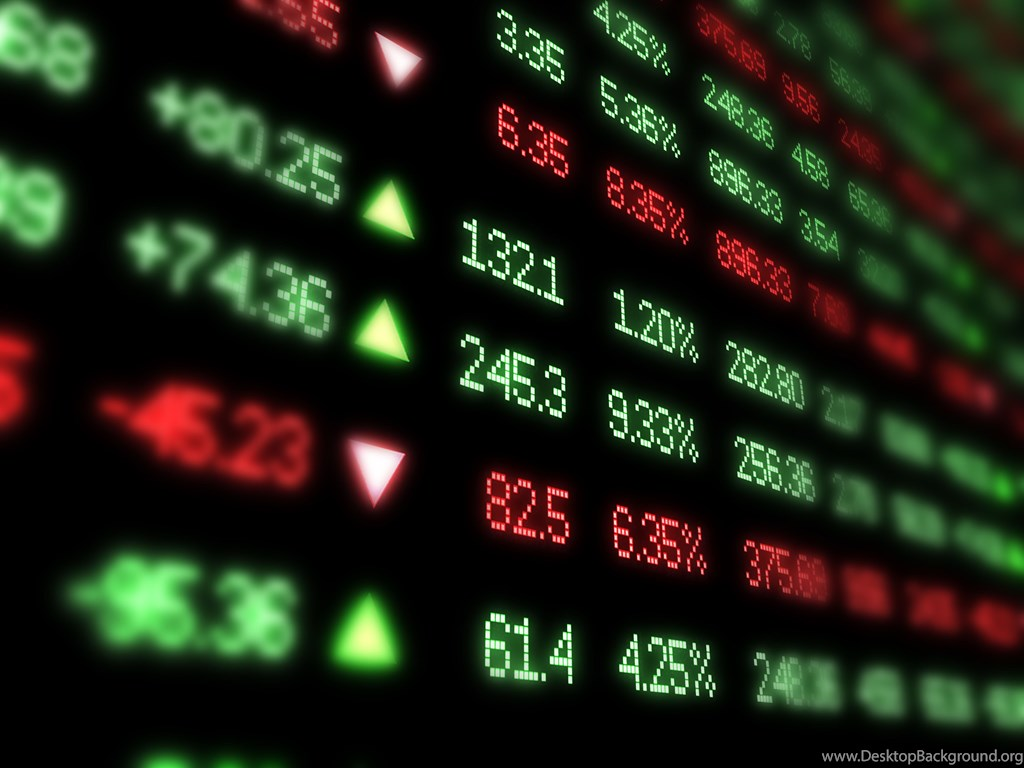

In [1]:
from IPython.display import Image
Image('C:/Users/Public/project/stock.jpg')

## Check out the Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


### Get the Data

In [2]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date(2019, 3,8)
data = pd.read_csv(r'C:\Users\Public\project\sap_stock.csv') # reading the data file

In [3]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [4]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [5]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [6]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

Assumptions before concluding that the model is the best.

1. Is the data linear in nature? 

Correlation of the independent variables with the dependent variables.
Found - Simple linear regression / multiple linear regression
Not Found - Polynomial regression

2. There must be no multi colinearity 

3. Residuals must be normally distributed. 

4. There should be little or no variance among residuals (Residual plot must Homoskedestic)
Scatterplot (y_hat, residuals) 


Steps while performing linear regression :
1. Decide what to implement - Simple Linear Regression
2. Finalize the columns - Radio  and TV
3. Split the data into training and testing

  sci kit learning (sklearn)
  x_train, x_test, y_test, y_train = train_test_split(x_values, y_values, test_size=0.3)

  It randomly selects the index number for splitting the data

4. Create object of Model class
5. FIt the training data (OLS method - theta 0 and theta 1)
6. Predict on the testing data

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [7]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [8]:
df.head()

,index,Close
0,0,25.59
1,1,26.87
2,2,26.64
3,3,26.18
4,4,25.73


In [9]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Close   2550 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.0 KB


In [10]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

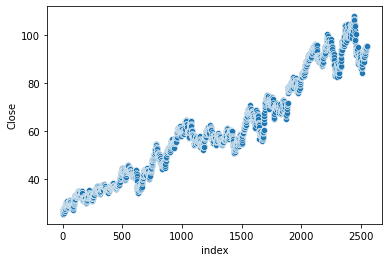

In [11]:
sns.scatterplot(data=df, x="index", y="Close")
plt.show()

## Linear Regression
 
Our data contains only one **independent variable ($X$)** which represents the *date* and the **dependent variable ($Y$)** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a **Simple Linear Regression**.

The best fit line can be described with  
$$
Y = \beta_0 + \beta_1 X
$$

where  
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

### Training a Linear Regression Model

### Train Test Split

In [12]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [13]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [14]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [15]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [16]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [17]:
# The coefficient
print("Coef = ", model.coef_)
print("intercept = ", model.intercept_)

Coef =  [0.02770542]
intercept =  25.744018195850636


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0277 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

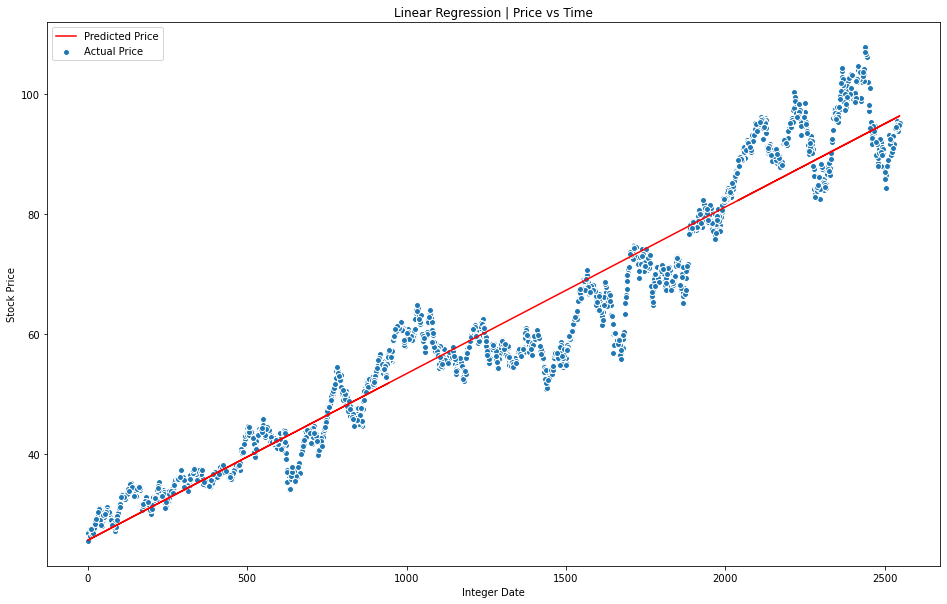

In [18]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [19]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [20]:
# Generate array with predicted values
y_pred = model.predict(X_test)


## Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [21]:
# Get number of rows in data set for random sample
df.shape

(2550, 2)

In [22]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [23]:
df_sample.head()

,index,Close
62,62,31.01
111,111,33.07
239,239,33.39
282,282,36.00
453,453,36.62


We can see some larger variations between predicted and actual values in the random sample.  
Let's see how the model performed over the whole test data set. 

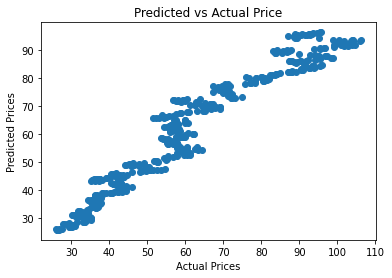

In [24]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.  
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right. 

In [25]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [26]:
df.head()

,index,Close,Prediction
0,0,25.59,25.744018
1,1,26.87,25.771724
2,2,26.64,25.799429
3,3,26.18,25.827134
4,4,25.73,25.854840


### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are **cost functions** we want to minimize.

In [27]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [28]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [29]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.372130048134346
Mean Squared Error: 30.211779758147983
Root Mean Squared Error: 5.496524334354209


* The MAE is 3% (of minimum) and 6% (of maximum) of the Closing Price.
* The other two errors are larger, because the errors are squared and have therefore a greater influence on the result.

### Accuracy Evaluation Metrics

To see how accurate our model is, we can calculate the **Coefficient of determination**, which describes the ratio between the total error and the error, that is explained by our model. It's value is between 0 and 1, with 1 meaning 100% of the error is acoounted for by the model. 

**Coefficient of determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

with  

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i = 1}^{N} \epsilon_i^2 = \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i = 1}^{N} (y_i - \bar{y}_i)^2
$$


In [30]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9342945798702859


In [31]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9344814331664277

# Conclusion : The value of $R^2$ shows that are model accounts for nearly 94% of the differences between the actual stock prices and the predicted prices. 